In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv('maindatadonedelindicator.csv')
df.shape

(1329, 49)

In [3]:
"""# selecting Feature Columns
feature_columns = [ 'Local_Institutes_buy', 'Local_Institutes_sell',
       'Local_Institutes_net', 'Proprietary_Trading_buy',
       'Proprietary_Trading_sell', 'Proprietary_Trading_net',
       'Foreign_Investors_buy', 'Foreign_Investors_sell',
       'Foreign_Investors_net', 'Local Investors', 'Unnamed: 11',
       'Unnamed: 12', 'Open', 'High', 'Low','Close', 'Adj Close', 'Volume',
       'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adjclose',
       'Gold_Volume', 'Dji_Open', 'Dji_High', 'Dji_Low', 'Dji_Close',
       'Dji_Adjclose', 'Dji_Volume', 'ADX', 'Aroon_Oscillator',
       'Stoch_Oscillator', 'MACD', 'RSI', 'ichimoku_a', 'ichimoku_b',
       'ichimoku_base_line', 'ichimoku_conversion_line', 'parabolic_sar',
       'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'bb_bbm', 'bb_bbh', 'bb_bbl']
"""

"# selecting Feature Columns\nfeature_columns = [ 'Local_Institutes_buy', 'Local_Institutes_sell',\n       'Local_Institutes_net', 'Proprietary_Trading_buy',\n       'Proprietary_Trading_sell', 'Proprietary_Trading_net',\n       'Foreign_Investors_buy', 'Foreign_Investors_sell',\n       'Foreign_Investors_net', 'Local Investors', 'Unnamed: 11',\n       'Unnamed: 12', 'Open', 'High', 'Low','Close', 'Adj Close', 'Volume',\n       'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adjclose',\n       'Gold_Volume', 'Dji_Open', 'Dji_High', 'Dji_Low', 'Dji_Close',\n       'Dji_Adjclose', 'Dji_Volume', 'ADX', 'Aroon_Oscillator',\n       'Stoch_Oscillator', 'MACD', 'RSI', 'ichimoku_a', 'ichimoku_b',\n       'ichimoku_base_line', 'ichimoku_conversion_line', 'parabolic_sar',\n       'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'bb_bbm', 'bb_bbh', 'bb_bbl']\n"

In [4]:
feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Close' , 'Volume' , 'Gold_Low' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume','Aroon_Oscillator','Stoch_Oscillator' ]

In [5]:
df = df[feature_columns]

In [6]:
"""#166 for each   if 1239 154 for each 154 ,  308 ,  462 ,  616  770 ,  924 ,  1078 ,  1232
X_train1 = df[:616]
X_test1 = df[616:770]

X_train2 = df[154:770]
X_test2 = df[770:924]


X_train3 = df[308:924]
X_test3 = df[924:1078]

X_train4 = df[462:1078]
X_test4 = df[1078:1232]"""

'#166 for each   if 1239 154 for each 154 ,  308 ,  462 ,  616  770 ,  924 ,  1078 ,  1232\nX_train1 = df[:616]\nX_test1 = df[616:770]\n\nX_train2 = df[154:770]\nX_test2 = df[770:924]\n\n\nX_train3 = df[308:924]\nX_test3 = df[924:1078]\n\nX_train4 = df[462:1078]\nX_test4 = df[1078:1232]'

In [7]:
#create a second data frame to predcit seocnd value 
df2 = df
df2['Next Close'] =  df2['Close'].shift(-1)
df = df2[:-1]
print(df['Close'])
print(df['Next Close'])


0       1711.739990
1       1712.750000
2       1714.650024
3       1703.030029
4       1689.280029
           ...     
1323    1508.869995
1324    1490.459961
1325    1490.510010
1326    1496.890015
1327    1496.959961
Name: Close, Length: 1328, dtype: float64
0       1712.750000
1       1714.650024
2       1703.030029
3       1689.280029
4       1687.050049
           ...     
1323    1490.459961
1324    1490.510010
1325    1496.890015
1326    1496.959961
1327    1491.140015
Name: Next Close, Length: 1328, dtype: float64


In [8]:
#166 for each   if 1239 154 for each 154 ,  308 ,  462 ,  616  770 ,  924 ,  1078 ,  1232
#166 
X_train1 = df[0:963]
X_train2 = df[328:1328]

#Y_predictresult = target_adj_close[867:]

# split train test first walk forward

In [9]:
data=X_train1[0:770]
test_data=X_train1[770:963]
#split train and test

In [10]:
data.shape

(770, 16)

In [11]:
test_data.shape

(193, 16)

In [12]:
print(len(data))
print(len(test_data))

770
193


normalize

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Next Close'].values.reshape(-1,1))

In [14]:
scaled_data.shape

(770, 1)

In [15]:
prediction_days = 1

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
x_train.shape

(769, 1, 1)

In [17]:
print(y_train.shape)

(769,)


In [18]:
def LSTM_model(units=100, dropout_rate=0.3):
    
    model = Sequential()    
    model.add(LSTM(units = units, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units = units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 1))
    
    return model

In [19]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(x_train, y_train, epochs=50, batch_size = 36,verbose = 2)

Epoch 1/50


22/22 - 3s - 136ms/step - loss: 0.3937
Epoch 2/50
22/22 - 0s - 4ms/step - loss: 0.0776
Epoch 3/50
22/22 - 0s - 4ms/step - loss: 0.0261
Epoch 4/50
22/22 - 0s - 4ms/step - loss: 0.0199
Epoch 5/50
22/22 - 0s - 4ms/step - loss: 0.0157
Epoch 6/50
22/22 - 0s - 3ms/step - loss: 0.0136
Epoch 7/50
22/22 - 0s - 3ms/step - loss: 0.0116
Epoch 8/50
22/22 - 0s - 3ms/step - loss: 0.0086
Epoch 9/50
22/22 - 0s - 4ms/step - loss: 0.0080
Epoch 10/50
22/22 - 0s - 3ms/step - loss: 0.0077
Epoch 11/50
22/22 - 0s - 3ms/step - loss: 0.0073
Epoch 12/50
22/22 - 0s - 3ms/step - loss: 0.0068
Epoch 13/50
22/22 - 0s - 3ms/step - loss: 0.0061
Epoch 14/50
22/22 - 0s - 4ms/step - loss: 0.0071
Epoch 15/50
22/22 - 0s - 4ms/step - loss: 0.0058
Epoch 16/50
22/22 - 0s - 4ms/step - loss: 0.0065
Epoch 17/50
22/22 - 0s - 4ms/step - loss: 0.0055
Epoch 18/50
22/22 - 0s - 3ms/step - loss: 0.0063
Epoch 19/50
22/22 - 0s - 4ms/step - loss: 0.0054
Epoch 20/50
22/22 - 0s - 4ms/step - loss: 0.0052
Epoch 21/50
22/22 - 0s - 4ms/step - lo

In [21]:
actual_prices = test_data['Next Close'].values
total_dataset = X_train1['Next Close']

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [22]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [23]:
predicted_prices.shape

(193, 1)

MSE: 144.13372856232638
MAPE:  2.8881874001291137 %


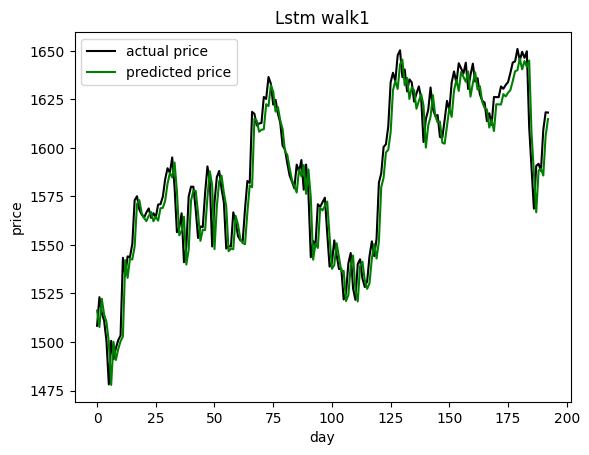

In [24]:
mse1 = mean_squared_error(actual_prices, predicted_prices)


print(f"MSE: {mse1}")


MAPE_score1 = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
print('MAPE: ', MAPE_score1, '%')

LSTMpredictfirst = predicted_prices

plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color= 'green', label=f"predicted price")
plt.title(f"Lstm walk1")
plt.xlabel("day")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [25]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(real_data.shape)

(1, 0, 1)


In [26]:
"""prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")"""

'prediction = model.predict(real_data)\nprediction = scaler.inverse_transform(prediction)\nprint(f"prediction: {prediction}")'

# train walk forward 2 

In [27]:
X_train2

,Local_Institutes_sell,Proprietary_Trading_sell,Foreign_Investors_net,Unnamed: 11,Open,Low,Close,Volume,Gold_Low,Gold_Open,Gold_Volume,Dji_Open,Dji_Volume,Aroon_Oscillator,Stoch_Oscillator,Next Close
328,3614.055196,6036.990413,669.924446,11390.571490,1626.890015,1622.939941,1632.319946,13043300.0,1314.300049,1315.599976,1.0,1315.599976,1.0,-60.0,57.113494,1629.400024
329,3141.324977,5395.165019,-2254.965527,11925.679850,1632.270020,1624.260010,1629.400024,14081000.0,1309.900024,1309.900024,206263.0,1309.900024,206263.0,-60.0,48.548152,1634.250000
330,3375.427948,7827.190303,64.984121,16038.136200,1626.599976,1625.770020,1634.250000,15464800.0,1287.699951,1308.400024,87798.0,1308.400024,87798.0,-60.0,62.775142,1638.650024
331,4100.527413,4768.572117,1326.321353,13106.247680,1639.310059,1635.239990,1638.650024,11081100.0,1286.099976,1289.599976,1265.0,1289.599976,1265.0,-60.0,75.682237,1644.640015
332,3636.917650,5313.823436,-193.953739,15827.016360,1645.369995,1644.219971,1644.640015,11050600.0,1285.699951,1291.800049,675.0,1291.800049,675.0,-60.0,83.024306,1651.479980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,3407.592795,3343.404306,-1089.141440,12428.801010,1512.930054,1506.359985,1508.869995,3168000.0,1914.699951,1923.500000,193.0,1923.500000,193.0,-40.0,43.868949,1490.459961
1324,4600.171755,3083.080622,-3164.838616,13016.360410,1503.380005,1486.489990,1490.459961,3033900.0,1903.199951,1909.300049,81.0,1909.300049,81.0,-40.0,27.124840,1490.510010
1325,3601.454457,3339.661823,-1503.506715,9200.234316,1481.910034,1474.939941,1490.510010,2226700.0,1913.400024,1913.400024,61.0,1913.400024,61.0,-40.0,27.171896,1496.890015
1326,2120.590418,3171.581330,-193.426256,9463.683273,1493.209961,1482.209961,1496.890015,2306200.0,1912.300049,1923.599976,269.0,1923.599976,269.0,-40.0,39.707416,1496.959961


In [28]:
data=X_train2[0:807]
test_data=X_train2[807:1328]
#split train and test

In [29]:
print(data.shape)
print(test_data.shape)

(807, 16)
(193, 16)


In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Next Close'].values.reshape(-1,1))

In [31]:
scaled_data.shape

(807, 1)

In [32]:
def LSTM_model(units=100, dropout_rate=0.3):
    
    model = Sequential()    
    model.add(LSTM(units = units, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units = units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 1))
    
    return model

In [33]:
prediction_days = 1

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [34]:
print(x_train.shape)

(806, 1, 1)


In [35]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(x_train, y_train, epochs=50, batch_size = 36,verbose = 2)

Epoch 1/50


23/23 - 3s - 127ms/step - loss: 0.4168
Epoch 2/50
23/23 - 0s - 3ms/step - loss: 0.0650
Epoch 3/50
23/23 - 0s - 3ms/step - loss: 0.0209
Epoch 4/50
23/23 - 0s - 3ms/step - loss: 0.0188
Epoch 5/50
23/23 - 0s - 3ms/step - loss: 0.0149
Epoch 6/50
23/23 - 0s - 3ms/step - loss: 0.0139
Epoch 7/50
23/23 - 0s - 3ms/step - loss: 0.0125
Epoch 8/50
23/23 - 0s - 3ms/step - loss: 0.0104
Epoch 9/50
23/23 - 0s - 4ms/step - loss: 0.0091
Epoch 10/50
23/23 - 0s - 3ms/step - loss: 0.0082
Epoch 11/50
23/23 - 0s - 3ms/step - loss: 0.0078
Epoch 12/50
23/23 - 0s - 3ms/step - loss: 0.0074
Epoch 13/50
23/23 - 0s - 3ms/step - loss: 0.0072
Epoch 14/50
23/23 - 0s - 3ms/step - loss: 0.0068
Epoch 15/50
23/23 - 0s - 3ms/step - loss: 0.0064
Epoch 16/50
23/23 - 0s - 4ms/step - loss: 0.0071
Epoch 17/50
23/23 - 0s - 3ms/step - loss: 0.0068
Epoch 18/50
23/23 - 0s - 3ms/step - loss: 0.0066
Epoch 19/50
23/23 - 0s - 3ms/step - loss: 0.0057
Epoch 20/50
23/23 - 0s - 3ms/step - loss: 0.0061
Epoch 21/50
23/23 - 0s - 3ms/step - lo

In [37]:
actual_prices = test_data['Next Close'].values
total_dataset = X_train2['Next Close']

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [38]:
model_inputs.shape

(194, 1)

In [39]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


MSE: 126.2782867628702
MAPE:  3.8693415073489943 %


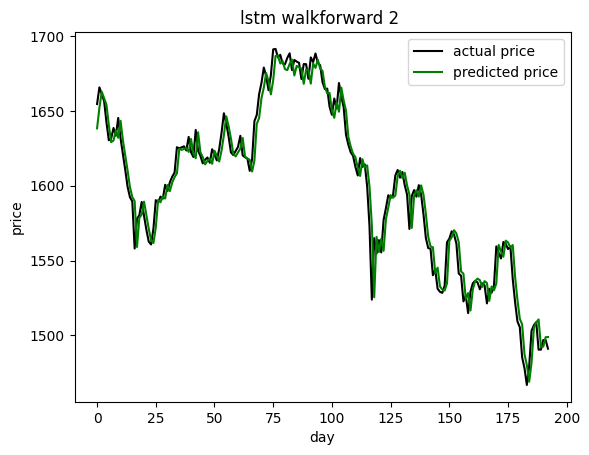

In [40]:
mse2 = (mean_squared_error(actual_prices, predicted_prices))


print(f"MSE: {mse2}")


MAPE_score2 = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
print('MAPE: ', MAPE_score2 , '%')


LSTMpredictsecond = predicted_prices


plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color= 'green', label=f"predicted price")
plt.title(f"lstm walkforward 2 ")
plt.xlabel("day")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [41]:
print(f"mse : {mse1} mse2 : {mse2}")
print(f"mape : {MAPE_score1} mape2 : {MAPE_score2}")

mse : 144.13372856232638 mse2 : 126.2782867628702
mape : 2.8881874001291137 mape2 : 3.8693415073489943


In [42]:
alllstmytest = np.concatenate([LSTMpredictsecond])

In [43]:
alllstmytest.shape

(193, 1)

In [44]:
ALL_Y.shape

NameError: name 'ALL_Y' is not defined

In [ ]:
yalltestdf = ALL_Y[664:]

In [45]:
LSTMpredictsecond

array([[1638.3134],
       [1652.2482],
       [1662.802 ],
       [1658.3936],
       [1654.1112],
       [1640.5386],
       [1629.1278],
       [1630.2487],
       [1636.9661],
       [1632.0491],
       [1643.3632],
       [1630.3828],
       [1620.347 ],
       [1610.0771],
       [1599.1176],
       [1592.4764],
       [1589.7037],
       [1559.0665],
       [1578.524 ],
       [1580.7317],
       [1589.3838],
       [1580.1385],
       [1571.289 ],
       [1563.5911],
       [1561.735 ],
       [1572.098 ],
       [1590.5281],
       [1588.9376],
       [1592.8252],
       [1591.4586],
       [1600.5004],
       [1596.4374],
       [1602.1145],
       [1605.7264],
       [1608.3223],
       [1624.6494],
       [1623.968 ],
       [1624.5438],
       [1625.2155],
       [1622.5757],
       [1631.2448],
       [1621.5001],
       [1618.4053],
       [1635.7231],
       [1622.3933],
       [1619.1265],
       [1614.2872],
       [1616.626 ],
       [1618.0496],
       [1614.6531],


In [46]:
secondlstmtimeseries = np.concatenate([LSTMpredictsecond])

In [47]:
slstm = pd.DataFrame(secondlstmtimeseries, columns=['Next Close'])

print(slstm)

      Next Close
0    1638.313354
1    1652.248169
2    1662.802002
3    1658.393555
4    1654.111206
..           ...
188  1510.703857
189  1492.468750
190  1492.518555
191  1498.845215
192  1498.914307

[193 rows x 1 columns]


In [48]:
slstm.to_csv('NextClose-slstm.csv',index=False)